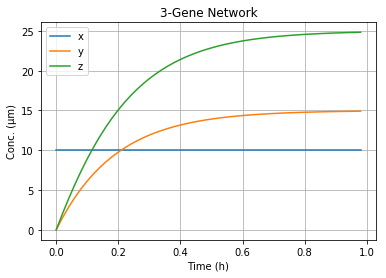

In [6]:
#Jeremy Reiser CSE4095 Assignment 1
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import requests

pxy = 0.15                                  #arbitrary constant pxy
pxz = 0.2                                   #arbitrary constant pxz
pyz = 0.2                                   #arbitrary constant pyz
py = 0.9                                    #arbitrary constant py
pz = 0.8                                    #arbitrary constant pz
y = np.tile(0.0, 50)                        #creates array of y values
y[0] = 0.0                                  #initial y value is 0
z = np.tile(0.0, 50)                        #creates array of z values
z[0] = 0.0                                  #initial z value is 0
results = np.tile(0.0, 2)
url = 'https://jeremyreiser.azurewebsites.net/api/TwoGeneNetworkService'

for i in range(1, 50):      #sends below data to web function
    data = {'y':y[i-1], 'z':z[i-1],'pxy':pxy, 'pxz':pxz, 'pyz':pyz, 'py':py, 'pz':pz}
    response = requests.post(url, json = data) #call web function
    results = response.json()                  #receive results array
    y[i] = results[0]      #extract y value
    z[i] = results[1]      #extract z value

    
# Data plotted
x = np.linspace(10, 10, 50)                 #x is plotted as constant
t = np.arange(0.0, 1.0, 0.02)               #sets time interval

fig, ax = plt.subplots()
ax.plot(t, x)                               #plots x vs. t 
ax.plot(t, y)                               #plots y vs. t
ax.plot(t, z)                               #plots z vs. t

ax.set(xlabel='Time (h)', ylabel='Conc. (\u03BCm)',
       title='3-Gene Network')

plt.legend(('x', 'y', 'z'),                 #creates legend
           loc='upper left')
ax.grid()

fig.savefig("3-Gene Network Web.png")
plt.show()
